In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from categorias import categorias

In [18]:
df = pd.read_csv('../data/Listado_de_Graduados_Programas_de_Pregrado_y_Posgrado_Universidad_de_Sucre_20240916.csv')

Exploración inicial

In [19]:
df.head()

,ANNIO,SEMESTRE,CONSECUTIVO,CODIGO SNIES,PROGRAMA ACADEMICO,ID_MUNICIPIO,SEXO,NIVEL ACADEMICO
0,2011,1,1,2777,BIOLOGIA,70001,FEMENINO,PREGRADO
1,2011,1,2,4627,INGENIERIA AGROINDUSTRIAL,70001,MASCULINO,PREGRADO
2,2011,1,3,52008,TECNOLOGIA EN REGENCIA DE FARMACIA,70001,FEMENINO,PREGRADO
3,2011,1,4,5100,INGENIERIA CIVIL,70001,FEMENINO,PREGRADO
4,2011,1,5,51831,ADMINISTRACION DE EMPRESAS,70001,FEMENINO,PREGRADO


In [20]:
df = df.rename(columns={'ANNIO': 'AÑO'})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AÑO                 10136 non-null  int64 
 1   SEMESTRE            10136 non-null  int64 
 2   CONSECUTIVO         10136 non-null  int64 
 3   CODIGO SNIES        10136 non-null  int64 
 4   PROGRAMA ACADEMICO  10136 non-null  object
 5   ID_MUNICIPIO        10136 non-null  int64 
 6   SEXO                10136 non-null  object
 7   NIVEL ACADEMICO     10136 non-null  object
dtypes: int64(5), object(3)
memory usage: 633.6+ KB


Limpieza de datos

In [22]:
print(f'Se han encontrado {df.isnull().sum().sum()} datos nulos')
print(f'Se han encontrado {df.duplicated().sum().sum()} datos duplicados')

Se han encontrado 0 datos nulos
Se han encontrado 0 datos duplicados


In [23]:
pregrados_num  = (df['NIVEL ACADEMICO'] == 'POSGRADOS').sum()

In [24]:
posgrados_num = ((df['NIVEL ACADEMICO'] == 'PREGRADO').sum()).sum()

In [25]:
drop_columns = ['CONSECUTIVO', 'CODIGO SNIES','ID_MUNICIPIO']

df = df.drop(drop_columns, axis=1)
df.head()

,AÑO,SEMESTRE,PROGRAMA ACADEMICO,SEXO,NIVEL ACADEMICO
0,2011,1,BIOLOGIA,FEMENINO,PREGRADO
1,2011,1,INGENIERIA AGROINDUSTRIAL,MASCULINO,PREGRADO
2,2011,1,TECNOLOGIA EN REGENCIA DE FARMACIA,FEMENINO,PREGRADO
3,2011,1,INGENIERIA CIVIL,FEMENINO,PREGRADO
4,2011,1,ADMINISTRACION DE EMPRESAS,FEMENINO,PREGRADO


In [26]:
# Agregar la nueva columna al DataFrame
df['CATEGORIA'] = df['PROGRAMA ACADEMICO'].map(categorias)

Analisis y visualización

In [27]:
graduates_per_year = df.groupby('AÑO').size().reset_index(name='NÚMERO DE GRADUADOS')

x = graduates_per_year['AÑO']
y = graduates_per_year['NÚMERO DE GRADUADOS']

In [28]:
graduates_per_year

,AÑO,NÚMERO DE GRADUADOS
0,2011,623
1,2012,855
2,2013,893
3,2014,1491
4,2015,541
5,2016,1219
6,2017,890
7,2018,816
8,2019,1549
9,2020,734


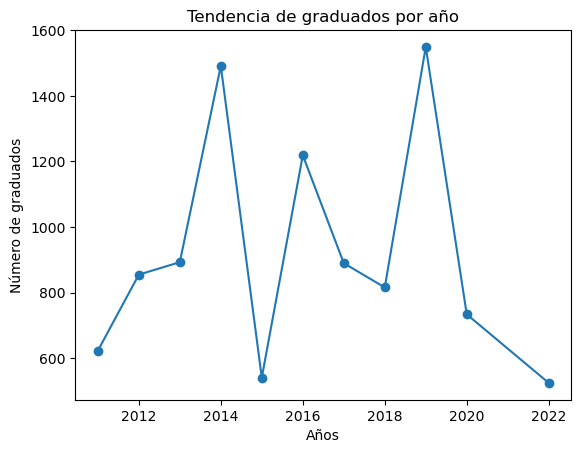

In [29]:
plt.plot(x,y, marker='o')
plt.xlabel('Años')
plt.ylabel('Número de graduados')
plt.title('Tendencia de graduados por año')
plt.show()

In [30]:
graduates_per_genre = df.groupby('SEXO').size().reset_index(name='CANTIDAD') 
graduates_per_genre

labels = graduates_per_genre['SEXO']

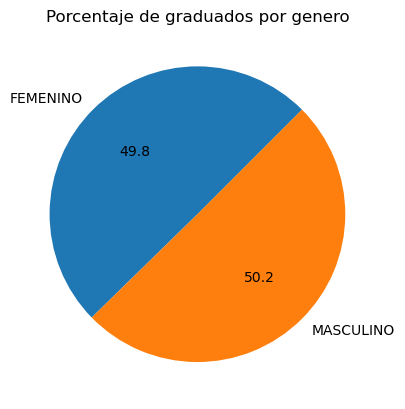

In [31]:
fig, ax = plt.subplots()
ax.pie(graduates_per_genre['CANTIDAD'], autopct='%1.1f', labels=labels, startangle=45)
plt.title('Porcentaje de graduados por genero')
plt.show()

In [35]:
graduates_per_category = df['CATEGORIA'].value_counts().reset_index(name='EGRESADOS')

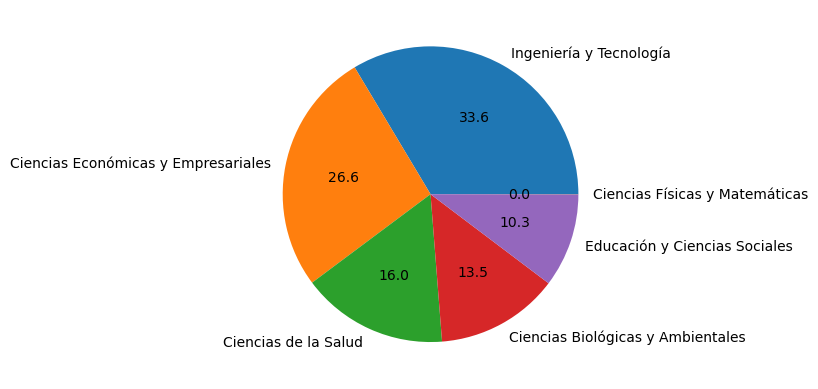

In [37]:
label = graduates_per_category['CATEGORIA']
values = graduates_per_category['EGRESADOS']

fig, ax = plt.subplots()

ax.pie(values, autopct='%1.1f', labels=label)
plt.show()

In [41]:
def exportar():
    df.to_csv('../results/Listado_de_graduados_unisucre_limpio.csv', index=False)
    graduates_per_year.to_csv('../results/Graduados_por_año.csv', index=False)

In [42]:
#exportar()